# Introduction

-----------------


This dataset contains house sale prices for King County, which includes Seattle. It's a great dataset for evaluating simple regression models. the dataset **House Sales in King County(USA)** will be use, it can be found at Kaggle.

# 1- EDA

------------

## A- Reading data:


In [59]:
# import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import patsy
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [60]:
# Load data
df = pd.read_csv('HouseSales.csv')


In [61]:
# Take a look at the first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [62]:
# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [63]:
# How many rows and columns does the dataset have?
df.shape

(21613, 21)

In [64]:
# check statistical values
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


## B- Cleaning data:

_______________

In [65]:
# Take a look at column names to notice  if we have the trailing whitespace problem
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [66]:
#pick out just a few columns 
df2= df.loc[:,['price', 'bedrooms', 'bathrooms', 
                      'sqft_living', 'floors', 'waterfront', 'view', 
                      'condition', 'grade', 'yr_built']]

In [67]:
df2.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,1.49,0.01,0.23,3.41,7.66,1971.01
std,367127.20,0.93,0.77,918.44,0.54,0.09,0.77,0.65,1.18,29.37
min,75000.00,0.00,0.00,290.00,1.00,0.00,0.00,1.00,1.00,1900.00
25%,321950.00,3.00,1.75,1427.00,1.00,0.00,0.00,3.00,7.00,1951.00
50%,450000.00,3.00,2.25,1910.00,1.50,0.00,0.00,3.00,7.00,1975.00
75%,645000.00,4.00,2.50,2550.00,2.00,0.00,0.00,4.00,8.00,1997.00
max,7700000.00,33.00,8.00,13540.00,3.50,1.00,4.00,5.00,13.00,2015.00


In [68]:
# View the correlations
df2.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
price,1.00,0.31,0.53,0.70,0.26,0.27,0.40,0.04,0.67,0.05
bedrooms,0.31,1.00,0.52,0.58,0.18,-0.01,0.08,0.03,0.36,0.15
bathrooms,0.53,0.52,1.00,0.75,0.50,0.06,0.19,-0.12,0.66,0.51
sqft_living,0.70,0.58,0.75,1.00,0.35,0.10,0.28,-0.06,0.76,0.32
floors,0.26,0.18,0.50,0.35,1.00,0.02,0.03,-0.26,0.46,0.49
waterfront,0.27,-0.01,0.06,0.10,0.02,1.00,0.40,0.02,0.08,-0.03
view,0.40,0.08,0.19,0.28,0.03,0.40,1.00,0.05,0.25,-0.05
condition,0.04,0.03,-0.12,-0.06,-0.26,0.02,0.05,1.00,-0.14,-0.36
grade,0.67,0.36,0.66,0.76,0.46,0.08,0.25,-0.14,1.00,0.45
yr_built,0.05,0.15,0.51,0.32,0.49,-0.03,-0.05,-0.36,0.45,1.00


In [69]:
# check to null values
df2.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
waterfront     0
view           0
condition      0
grade          0
yr_built       0
dtype: int64

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   waterfront   21613 non-null  int64  
 6   view         21613 non-null  int64  
 7   condition    21613 non-null  int64  
 8   grade        21613 non-null  int64  
 9   yr_built     21613 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


In [71]:
# convert the data type of bathrooms and floors features into int
df2.bathrooms.round()
df2.floors.round()

0       1.00
1       2.00
2       1.00
3       1.00
4       1.00
        ... 
21608   3.00
21609   2.00
21610   2.00
21611   2.00
21612   2.00
Name: floors, Length: 21613, dtype: float64

In [72]:
df2.bathrooms=df2.bathrooms.astype('int')
df2.floors=df2.floors.astype('int')

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  int32  
 3   sqft_living  21613 non-null  int64  
 4   floors       21613 non-null  int32  
 5   waterfront   21613 non-null  int64  
 6   view         21613 non-null  int64  
 7   condition    21613 non-null  int64  
 8   grade        21613 non-null  int64  
 9   yr_built     21613 non-null  int64  
dtypes: float64(1), int32(2), int64(7)
memory usage: 1.5 MB


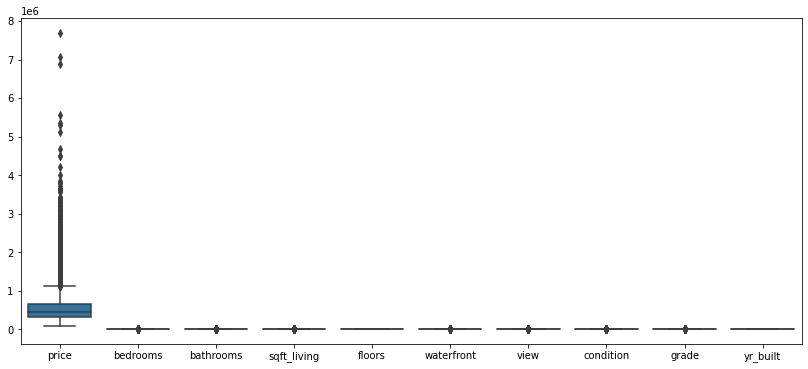

In [74]:
# check out layer value
plt.figure(figsize=[14,6])
sns.boxplot(data=df2);

## C-  Answer Questions:

_________________

### Q1/ What is the most area space built for the houses In the King country USA?

_______________________

In [75]:
df.sqft_living.value_counts().head(10)

1300    138
1400    135
1440    133
1010    129
1660    129
1800    129
1820    128
1720    125
1480    125
1540    124
Name: sqft_living, dtype: int64

In [76]:
......

SyntaxError: invalid syntax (<ipython-input-76-dc599f55e781>, line 1)

### Q2/ Does the space of the house effect on the price?

--------------

In [77]:
groupd1=df2.groupby(['sqft_living'])[['price']].mean().sort_values('price',ascending=False)
groupd1

,price
sqft_living,
12050,7700000.00
10040,7062500.00
9890,6885000.00
9200,5570000.00
8000,5350000.00
...,...
290,142000.00
844,139950.00
500,125000.00


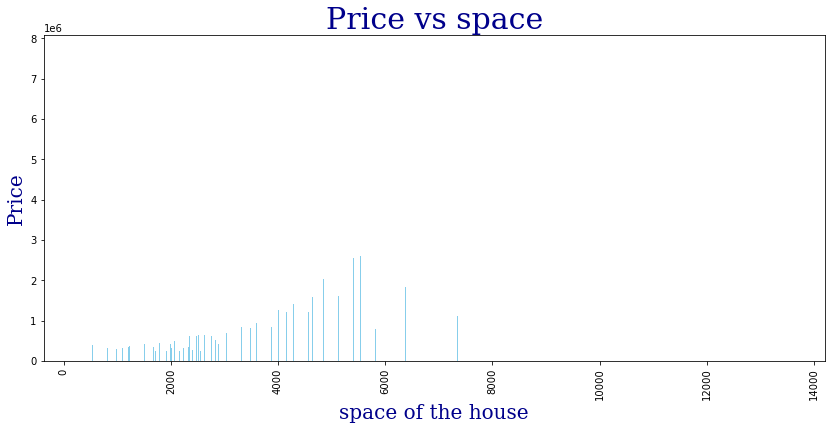

In [78]:
plt.figure(figsize=[14,6])
plt.bar(groupd1.index,groupd1.price, color='skyblue');
plt.xticks(rotation=90);
plt.title('Price vs space',fontsize=30,color='darkblue',family='serif');
plt.xlabel('space of the house',fontsize=20,color='darkblue',family='serif');
plt.ylabel('Price',fontsize=20,color='darkblue',family='serif');
plt.savefig("q1.png", dpi=250)

### Q3/ What is the relationship between the height of the house land and the price of the house?

--------------

In [79]:
groupd2=df2.groupby(['grade'])[['price']].mean().sort_values('price',ascending=False)
groupd2

,price
grade,
13,3709615.38
12,2191222.00
11,1496841.73
10,1071771.07
9,773513.19
8,542852.77
7,402590.26
6,301919.64
5,248523.97


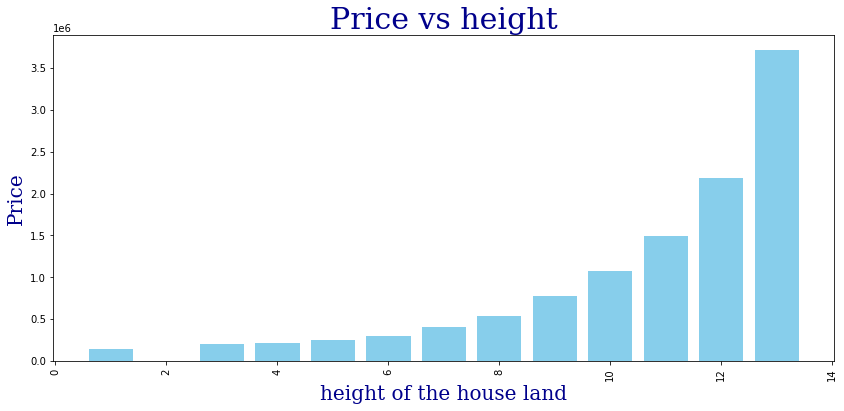

In [80]:
plt.figure(figsize=[14,6])
plt.bar(groupd2.index,groupd2.price, color='skyblue');
plt.xticks(rotation=90);
plt.title('Price vs height',fontsize=30,color='darkblue',family='serif');
plt.xlabel('height of the house land',fontsize=20,color='darkblue',family='serif');
plt.ylabel('Price',fontsize=20,color='darkblue',family='serif');
plt.savefig("q1.png", dpi=250)

### Q4/ Are the waterfront houses more expensive than others?

--------------

In [81]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [82]:
x=df2.groupby(['waterfront'])[['price']].mean().sort_values('price',ascending=False)
x

,price
waterfront,
1,1661876.02
0,531563.60


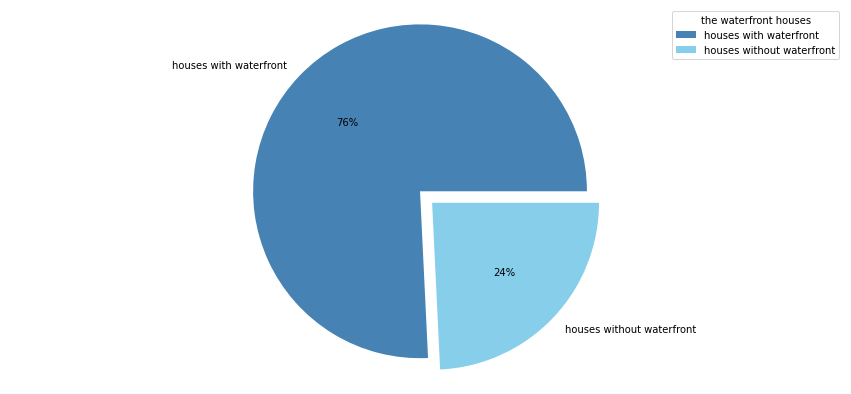

In [83]:
plt.figure(figsize=[15,7]);
plt.pie(x.price ,labels=['houses with waterfront','houses without waterfront'] , colors = ['steelblue','skyblue'], explode = (0,0.1), autopct='%1.0f%%');
plt.axis('equal');
plt.legend(title = "the waterfront houses");
plt.savefig("q3.png", dpi=250)

In [84]:
df2.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
price,1.00,0.31,0.51,0.70,0.24,0.27,0.40,0.04,0.67,0.05
bedrooms,0.31,1.00,0.47,0.58,0.16,-0.01,0.08,0.03,0.36,0.15
bathrooms,0.51,0.47,1.00,0.70,0.48,0.06,0.18,-0.13,0.61,0.43
sqft_living,0.70,0.58,0.70,1.00,0.35,0.10,0.28,-0.06,0.76,0.32
floors,0.24,0.16,0.48,0.35,1.00,0.02,0.02,-0.29,0.47,0.58
waterfront,0.27,-0.01,0.06,0.10,0.02,1.00,0.40,0.02,0.08,-0.03
view,0.40,0.08,0.18,0.28,0.02,0.40,1.00,0.05,0.25,-0.05
condition,0.04,0.03,-0.13,-0.06,-0.29,0.02,0.05,1.00,-0.14,-0.36
grade,0.67,0.36,0.61,0.76,0.47,0.08,0.25,-0.14,1.00,0.45
yr_built,0.05,0.15,0.43,0.32,0.58,-0.03,-0.05,-0.36,0.45,1.00


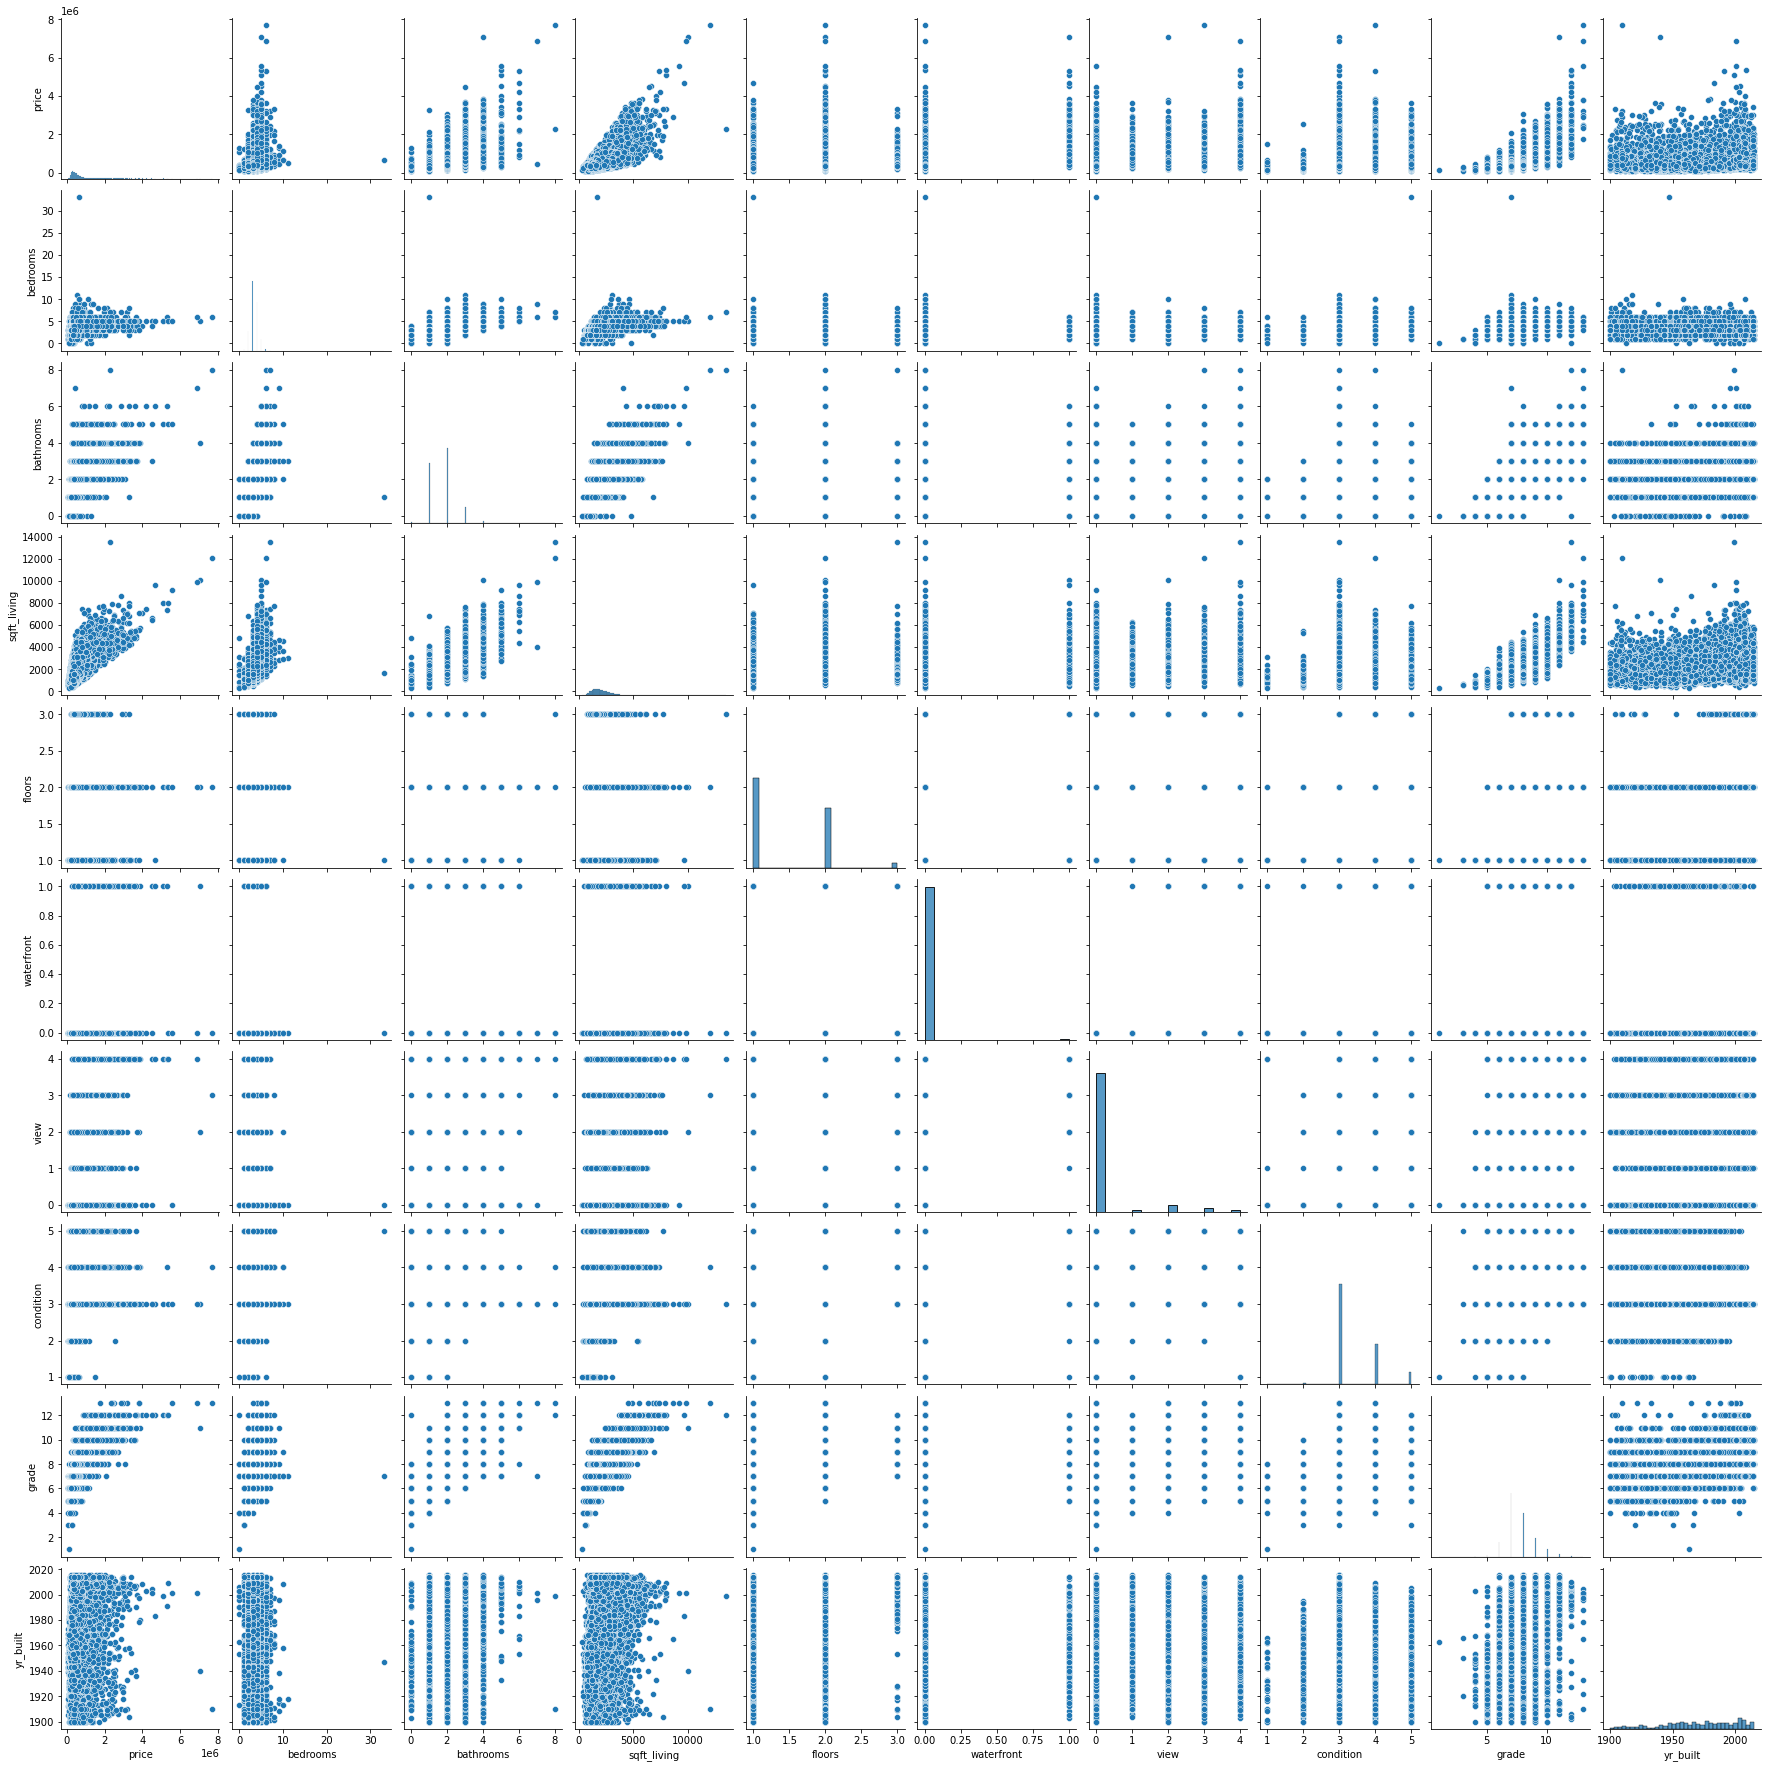

In [85]:
sns.pairplot(df2)